<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_matplotlib_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python alapok Matplotlib használata 2.

<https://klajosw.blogspot.com/>


---

In [ ]:
## csomagok importálása
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import random as rd

## A mágikus parancs  bekapcsolja az inline plots rajzolás lehetőséget. A grafika alaphelyzetbe állítása és betöltése.
## Az inline direktiva a grafikai megjelenitést engedélyezi külső program nélkül is
%matplotlib inline
a = """
  %matplotlib          ## megjelenítéshez használni fog egy csomagot  (pl. Qt5Agg)
  %matplotlib notebook ## interaktív rajzokhoz, amelyek be vannak ágyazva a notebookba
  %matplotlib inline   ## statikus képeket eredményez, amely be van ágyazva a notebookba

----------------

The pyplot interface provides 4 commands that are useful for interactive control.

  isinteractive() ## returns the interactive setting True|False
  ion()           ## turns interactive mode on
  ioff()          ## turns interactive mode off
  draw()          ## forces a figure redraw

"""

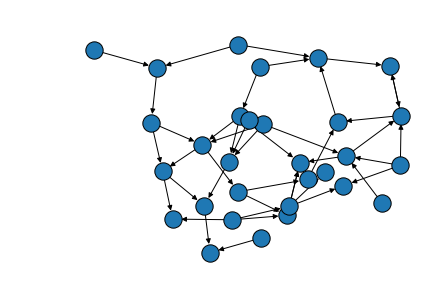

In [ ]:
## hálózat elemzés
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

In [ ]:
## elemzés
nx.pagerank(g)

{0: 0.01321914850756847,
 1: 0.04305614905051307,
 2: 0.0224184422385673,
 3: 0.020763573555365067,
 4: 0.1519409000092644,
 5: 0.015278038556628357,
 6: 0.04357199076624549,
 7: 0.08868962006965002,
 8: 0.009276594051426114,
 9: 0.027215223573378695,
 10: 0.009276594051426114,
 11: 0.009276594051426114,
 12: 0.009276594051426114,
 13: 0.021104257419853185,
 14: 0.023535500084085954,
 15: 0.009276594051426114,
 16: 0.018135203917936826,
 17: 0.009276594051426114,
 18: 0.01264966891920012,
 19: 0.05375946044542632,
 20: 0.009276594051426114,
 21: 0.011904963688854351,
 22: 0.15057445865003966,
 23: 0.02084377195458973,
 24: 0.025679331302227965,
 25: 0.02721686924658904,
 26: 0.0925438315518033,
 27: 0.009276594051426114,
 28: 0.009276594051426114,
 29: 0.03241025002937753}

In [ ]:
for i in g:
    print(f"Node {i} has neighbors {g[i]}")

Node 0 has neighbors {6: {}, 14: {}, 25: {}}
Node 1 has neighbors {19: {}}
Node 2 has neighbors {6: {}, 22: {}}
Node 3 has neighbors {6: {}}
Node 4 has neighbors {22: {}}
Node 5 has neighbors {}
Node 6 has neighbors {}
Node 7 has neighbors {26: {}}
Node 8 has neighbors {0: {}, 26: {}}
Node 9 has neighbors {25: {}, 29: {}}
Node 10 has neighbors {2: {}, 14: {}, 25: {}}
Node 11 has neighbors {3: {}, 21: {}, 24: {}}
Node 12 has neighbors {13: {}}
Node 13 has neighbors {9: {}}
Node 14 has neighbors {1: {}}
Node 15 has neighbors {13: {}, 26: {}}
Node 16 has neighbors {7: {}}
Node 17 has neighbors {2: {}, 5: {}, 22: {}}
Node 18 has neighbors {}
Node 19 has neighbors {}
Node 20 has neighbors {19: {}}
Node 21 has neighbors {5: {}, 6: {}, 18: {}}
Node 22 has neighbors {4: {}, 7: {}}
Node 23 has neighbors {3: {}, 16: {}}
Node 24 has neighbors {}
Node 25 has neighbors {23: {}, 29: {}}
Node 26 has neighbors {4: {}}
Node 27 has neighbors {14: {}}
Node 28 has neighbors {2: {}}
Node 29 has neighbors {

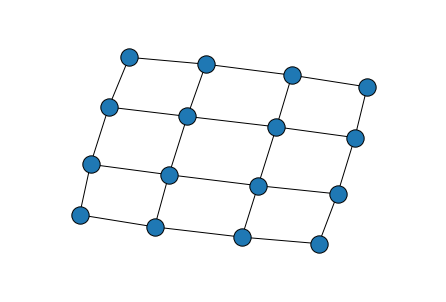

In [ ]:
n = 4 # dimension 1
m = 4 # dimension 2
N = n * m # number of nodes
k = 4 # number of neighbors of each node

def initialize():
    global g
    g = nx.Graph()
    for i in range(n): # row
        for j in range(m): # column
            node = j + i*n
            if node+1 < n:
                g.add_edge(node, (node + 1))
            if (node - 1) >= i*n:
                g.add_edge(node, (node - 1))
            if (node + n) < N:
                g.add_edge(node, (node + n))
            if (node - n) >= 0:
                g.add_edge(node, (node - n))
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    nx.draw(g, pos = g.pos)

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # rewiring once in every 20 steps
        nds = list(g.nodes)
        i = rd.choice(nds)
        if g.degree[i] > 0:
            g.remove_edge(i, rd.choice(list(g.neighbors(i))))
            nds.remove(i)
            for j in g.neighbors(i):
                nds.remove(j)
            g.add_edge(i, rd.choice(nds))

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)
    
initialize()
observe()

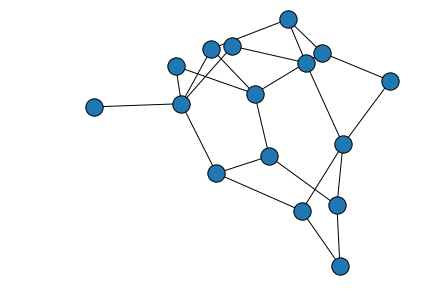

In [ ]:
# run simulations
initialize()
for tstep in range(400):
    update()
observe()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


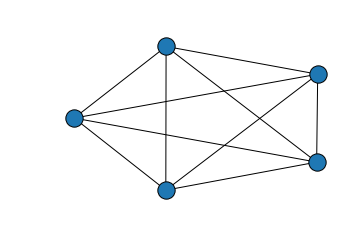

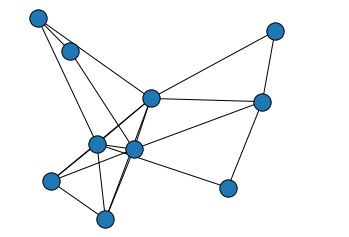

In [ ]:
import matplotlib
# matplotlib.use('TkAgg')
from pylab import *
import networkx as nx

m0 = 5 # number of nodes in initial condition
m = 2 # number of edges per new node

def initialize():
    global g
    g = nx.complete_graph(m0)
    g.pos = nx.spring_layout(g)
    g.count = 0

def observe():
    global g
    cla()
    nx.draw(g, pos = g.pos)

def pref_select(nds):
    global g
    r = uniform(0, sum(g.degree(i) for i in nds))
    x=0
    for i in nds:
        x += g.degree[i]
        if r <= x:
            return i

def update():
    global g
    g.count += 1
    if g.count % 20 == 0: # network growth once in every 20 steps
        nds = list(g.nodes)
        newcomer = max(nds) + 1
        for i in range(m):
            j = pref_select(nds)
            g.add_edge(newcomer, j)
            nds.remove(j)
        g.pos[newcomer] = (0, 0)

    # simulation of node movement
    g.pos = nx.spring_layout(g, pos = g.pos, iterations = 5)
    
initialize()
plt.figure(0)
observe()
for _ in range(100):
    update()
plt.figure(1)
observe()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


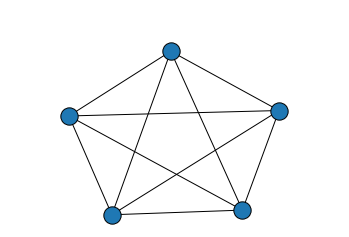

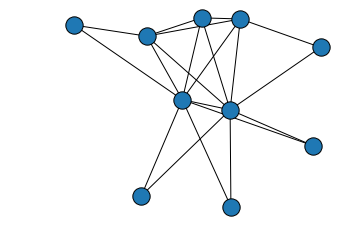

In [ ]:
initialize()
plt.figure(0)
observe()
for _ in range(100):
    update()
plt.figure(1)
observe()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


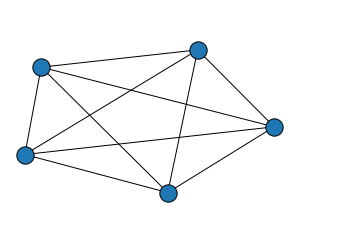

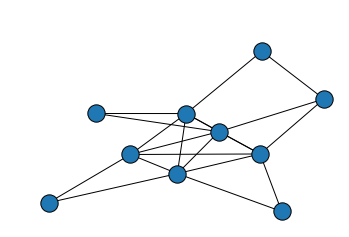

In [ ]:
initialize()
plt.figure(0)
observe()
for _ in range(100):
    update()
plt.figure(1)
observe()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


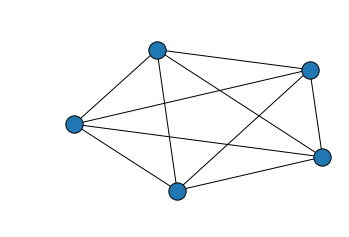

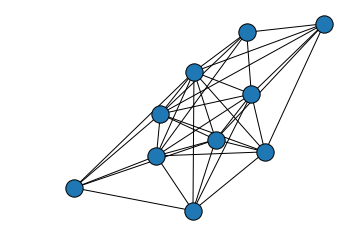

In [ ]:
m = 5
initialize()
plt.figure(0)
observe()
for _ in range(100):
    update()
plt.figure(1)
observe()